# Evaluating User Engagement, Purchase Patterns, and Marketing Effectiveness at Y.Afisha

# Contents

1. Introduction and Objectives
2. Steps Taken
3. Data Processing
4. Data Analysis
5. Data Visualization
6. Conclusion

# Introduction and Objectives

During the internship program in the analytics department of Y.Afisha company, the first task was aimed at helping to optimize the marketing budget. The analysis was supported by:

* Server logs containing site visit data to Y.Afisha from January 2017 to December 2018
* Dump files containing all orders for that period
* Marketing cost statistics

Additionally, the study aimed to:

* Understand how users interact with Y.Afisha's products
* Determine when users start making purchases
* Calculate the revenue contributed by each user
* Identify when all marketing expenses are paid off 

# Steps Taken

1. Download and prepare the data for analysis
2. Compile reports and calculate the necessary metrics
    * Product
        * How many people use the product daily, weekly, and monthly?
        * How many sessions occur per day? (A single user might have multiple sessions).
        * What is the average duration of each session?
        * How frequently do users return to use the product?
    * Sales
        * When do users start making purchases? (In KPI analysis, we are usually interested in the time elapsed from registration to conversion (or when users officially become customers). For instance, if registration and the first purchase occur on the same day, the user can be classified as Conversion h0. If the first purchase happens the next day, the classification would be Conversion h1. You may use any approach that allows you to compare conversions from different cohorts, helping you identify which cohort or marketing channel is most effective).
        * How many orders do users place over a certain period?
        * What is the average purchase value?
        * What is the total revenue contributed by users? (LTV)
    * Marketing
        * How much money is spent? Overall/per source/over time
        * What is the customer acquisition cost from each source?
        * How profitable is the investment? (ROI)
    Create charts that display the differences in these metrics across various devices and advertising sources, as well as changes over time.
3. Conclusion: Provide marketing specialists with recommendations on how much money to invest and where these investments should be allocated.

# 1. Data overview

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
from scipy import stats as st

In [2]:
df_visits = pd.read_csv('/datasets/visits_log_us.csv')
df_orders = pd.read_csv('/datasets/orders_log_us.csv')
df_costs = pd.read_csv('/datasets/costs_us.csv')

**Mengoptimalkan df_visits**

In [3]:
df_visits.sample(5)

,Device,End Ts,Source Id,Start Ts,Uid
279104,touch,2017-10-06 10:18:00,4,2017-10-06 10:12:00,2101314373325897665
222264,touch,2018-05-11 23:05:00,2,2018-05-11 22:58:00,2167262359166982553
294825,desktop,2017-06-07 10:13:00,3,2017-06-07 10:02:00,14907036246572609942
51310,touch,2018-03-22 16:05:00,2,2018-03-22 15:43:00,10438974714208943002
266858,desktop,2017-12-11 11:22:00,3,2017-12-11 11:18:00,11564571176353198680


In [4]:
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
df_visits = df_visits.rename(columns = {'Device': 'device', 'End Ts': 'end_ts', 'Source Id': 'source_id', 'Start Ts': 'start_ts', 'Uid': 'uid'})

In [6]:
df_visits['device'].value_counts()

desktop    262567
touch       96833
Name: device, dtype: int64

In [7]:
df_visits['device'] = df_visits['device'].astype('category')

In [8]:
df_visits['start_ts'] =  pd.to_datetime(df_visits['start_ts'], format="%Y-%m-%d %H:%M")
df_visits['end_ts'] =  pd.to_datetime(df_visits['end_ts'], format="%Y-%m-%d %H:%M")

In [9]:
df_visits[df_visits['start_ts'] > df_visits['end_ts']]

,device,end_ts,source_id,start_ts,uid
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453


In [10]:
df_visits = df_visits[df_visits['start_ts'] <= df_visits['end_ts']]

In [11]:
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359398 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359398 non-null  category      
 1   end_ts     359398 non-null  datetime64[ns]
 2   source_id  359398 non-null  int64         
 3   start_ts   359398 non-null  datetime64[ns]
 4   uid        359398 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 14.1 MB


**Mengoptimalkan df_orders**

In [12]:
df_orders.sample(5)

,Buy Ts,Revenue,Uid
15223,2017-10-29 21:39:00,3.05,6246058629109250981
19270,2017-11-24 13:11:00,2.27,9715290219112529003
18118,2017-11-17 17:15:00,0.49,16516408538467221495
5423,2017-08-16 11:04:00,0.61,5367126055113114400
5691,2017-08-20 23:52:00,1.34,5700583337870519674


In [13]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [14]:
df_orders = df_orders.rename(columns = {'Buy Ts': 'buy_ts', 'Revenue': 'revenue', 'Uid':'uid'})

In [15]:
df_orders['buy_ts'] =  pd.to_datetime(df_orders['buy_ts'], format="%Y-%m-%d %H:%M")

In [16]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


**Mengoptimalkan df_costs**

In [17]:
df_costs.sample(5)

,source_id,dt,costs
554,2,2017-12-09,128.35
1321,4,2018-01-19,363.74
606,2,2018-01-30,153.06
2321,10,2017-10-21,20.70
456,2,2017-09-02,57.95


In [18]:
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [19]:
df_costs['dt'] =  pd.to_datetime(df_costs['dt'], format="%Y-%m-%d")

In [20]:
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


The column names of the three files have been changed, and the data types for each column have been adjusted as necessary. Each file has no missing rows. Therefore, the data is ready for further analysis.

# 2. Report and Calculate the Necessary Metrics

## Product

### Number of People Using the Product Daily, Weekly, and Monthly

In [21]:
df_visits.sample(5)

,device,end_ts,source_id,start_ts,uid
247315,touch,2017-06-14 00:30:00,4,2017-06-14 00:21:00,12887980593847937416
147609,touch,2017-08-29 22:38:00,3,2017-08-29 22:37:00,1127171789956323142
138670,desktop,2017-07-01 14:03:00,5,2017-07-01 14:02:00,10407799669337131355
119719,desktop,2017-09-23 11:47:00,4,2017-09-23 11:46:00,16809298212771175526
173015,desktop,2017-08-10 18:27:00,1,2017-08-10 18:27:00,17092687748422035640


In [22]:
df_visits['session_year']  = df_visits['start_ts'].dt.year
df_visits['session_month'] = df_visits['start_ts'].dt.month
df_visits['session_week']  = df_visits['start_ts'].dt.week
df_visits['session_date'] = df_visits['start_ts'].dt.date

/tmp/ipykernel_322/3500501610.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_visits['session_week']  = df_visits['start_ts'].dt.week


In [23]:
dau_total = df_visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = df_visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_total = df_visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()

In [24]:
dau_total

uid    907.991758
dtype: float64

In [25]:
wau_total

uid    5716.245283
dtype: float64

In [26]:
mau_total

uid    23228.416667
dtype: float64

The number of people using the product daily is 907, weekly is 5,716, and monthly is 23,228.

### Determine the Number of Sessions per Day

In [27]:
sessions_per_day = df_visits.groupby(['session_date']).agg(
    {'uid': ['count', 'nunique']}
)
sessions_per_day.columns = ['n_sessions', 'n_users']
sessions_per_day['sessions_per_user'] = (
    sessions_per_day['n_sessions'] / sessions_per_day['n_users']
)
sessions_per_day

,n_sessions,n_users,sessions_per_user
session_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024
...,...,...,...
2018-05-27,672,620,1.083871
2018-05-28,1156,1039,1.112608
2018-05-29,1035,948,1.091772


<AxesSubplot:xlabel='session_date'>

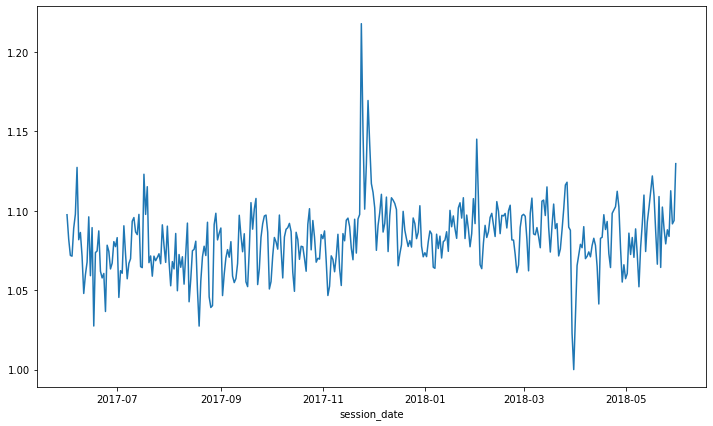

In [28]:
sessions_per_day['sessions_per_user'].plot(kind='line', figsize=(12, 7))

The average number of sessions per user tends to be around 1, indicating that most users have one session per day, with a higher frequency towards the end of the year.

### Determine the Duration of Each Session

In [29]:
df_visits['session_duration_sec'] = (df_visits['end_ts'] - df_visits['start_ts']).dt.seconds
df_visits['session_duration_sec'].mean()

643.0422873805642

<AxesSubplot:>

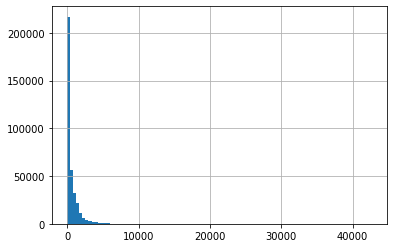

In [30]:
df_visits['session_duration_sec'].hist(bins=100)

In [31]:
asl = df_visits['session_duration_sec'].mode()
asl

0    60
dtype: int64

The average duration per session is 643 seconds, or approximately 10 to 11 minutes.

### Determine How Frequently Users Return to Use the Product

In [32]:
sticky_wau = dau_total / wau_total * 100
sticky_wau

uid    15.884409
dtype: float64

In [33]:
sticky_mau = dau_total / mau_total * 100
sticky_mau

uid    3.90897
dtype: float64

Weekly active users constitute 15% of the user base, while monthly active users make up 3%. The number is gradually decreasing.

## Sales

### Determine When Users Start Making Purchases

In [34]:
df_visits.head(5)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0


In [35]:
first_visits = df_visits.groupby('uid').agg({'start_ts':'min'}).reset_index()
first_visits.columns = ['uid', 'first_session_start']
first_visits['first_session_dt'] = first_visits['first_session_start'].dt.date
first_visits['first_session_week'] = first_visits['first_session_start'].astype('datetime64[W]')
first_visits['first_session_month'] = first_visits['first_session_start'].astype('datetime64[M]')
first_visits['first_session_year'] = first_visits['first_session_start'].astype('datetime64[Y]')
first_visits.sample()

,uid,first_session_start,first_session_dt,first_session_week,first_session_month,first_session_year
5605,460731787907429419,2017-08-21 13:44:00,2017-08-21,2017-08-17,2017-08-01,2017-01-01


In [36]:
df_orders.head(5)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [37]:
first_order = df_orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_order.sample(5)

,uid,buy_ts
3391,1725461983571535779,2017-06-28 08:45:00
16760,8416950611158721809,2018-04-15 19:10:00
11717,5870455001698166379,2017-11-28 23:04:00
2322,1194240303643295084,2017-12-14 12:04:00
4179,2111366202046444790,2017-10-21 23:38:00


In [38]:
first_order.columns = ['uid', 'first_order_ts']
first_order['first_order_date'] = first_order['first_order_ts'].dt.date
first_order['first_order_month'] = first_order['first_order_ts'].astype('datetime64[M]')
first_order['first_order_week'] = first_order['first_order_ts'].astype('datetime64[W]')
first_order.sample(5)

,uid,first_order_ts,first_order_date,first_order_month,first_order_week
24922,12588881524554545415,2017-12-17 15:55:00,2017-12-17,2017-12-01,2017-12-14
1996,1034860357122198669,2017-12-10 04:09:00,2017-12-10,2017-12-01,2017-12-07
22793,11517961076720705434,2018-05-29 15:27:00,2018-05-29,2018-05-01,2018-05-24
28860,14567367368690425986,2017-09-21 19:32:00,2017-09-21,2017-09-01,2017-09-21
28113,14207085829699747773,2017-12-11 10:43:00,2017-12-11,2017-12-01,2017-12-07


In [39]:
first_buy = pd.merge(first_visits, first_order, on='uid')
first_buy.sample(5)

,uid,first_session_start,first_session_dt,first_session_week,first_session_month,first_session_year,first_order_ts,first_order_date,first_order_month,first_order_week
10434,5243861686670050210,2017-08-26 19:56:00,2017-08-26,2017-08-24,2017-08-01,2017-01-01,2017-08-27 10:28:00,2017-08-27,2017-08-01,2017-08-24
2000,1037515234313499886,2018-02-13 20:21:00,2018-02-13,2018-02-08,2018-02-01,2018-01-01,2018-02-13 20:23:00,2018-02-13,2018-02-01,2018-02-08
20311,10265455748681672003,2018-01-10 18:15:00,2018-01-10,2018-01-04,2018-01-01,2018-01-01,2018-01-10 19:28:00,2018-01-10,2018-01-01,2018-01-04
24182,12231908034358510243,2017-06-04 19:34:00,2017-06-04,2017-06-01,2017-06-01,2017-01-01,2017-06-04 19:50:00,2017-06-04,2017-06-01,2017-06-01
36380,18369762445239083848,2017-10-20 19:10:00,2017-10-20,2017-10-19,2017-10-01,2017-01-01,2017-10-20 19:14:00,2017-10-20,2017-10-01,2017-10-19


In [40]:
first_buy['first_order_date'] = pd.to_datetime(first_buy['first_order_date'])
first_buy['first_session_date'] = pd.to_datetime(first_buy['first_session_dt'])
first_buy['first_day_purchase'] = (first_buy['first_order_date'] - first_buy['first_session_date']).dt.days
first_buy.sample(5)

,uid,first_session_start,first_session_dt,first_session_week,first_session_month,first_session_year,first_order_ts,first_order_date,first_order_month,first_order_week,first_session_date,first_day_purchase
35047,17686151873866323775,2017-10-30 01:19:00,2017-10-30,2017-10-26,2017-10-01,2017-01-01,2017-10-30 01:22:00,2017-10-30,2017-10-01,2017-10-26,2017-10-30,0
18814,9520901852760616220,2017-11-01 20:52:00,2017-11-01,2017-10-26,2017-11-01,2017-01-01,2017-11-02 01:51:00,2017-11-02,2017-11-01,2017-11-02,2017-11-01,1
34083,17221455572944295464,2017-11-21 07:04:00,2017-11-21,2017-11-16,2017-11-01,2017-01-01,2018-01-26 20:05:00,2018-01-26,2018-01-01,2018-01-25,2017-11-21,66
1983,1028245305353219830,2017-12-25 20:13:00,2017-12-25,2017-12-21,2017-12-01,2017-01-01,2017-12-25 20:17:00,2017-12-25,2017-12-01,2017-12-21,2017-12-25,0
31280,15776296936818079873,2017-08-25 23:23:00,2017-08-25,2017-08-24,2017-08-01,2017-01-01,2017-08-26 08:41:00,2017-08-26,2017-08-01,2017-08-24,2017-08-25,1


<AxesSubplot:ylabel='Frequency'>

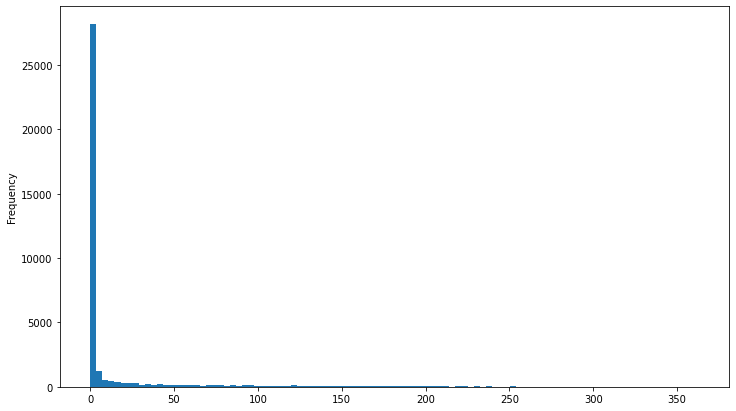

In [41]:
first_buy['first_day_purchase'].plot(kind='hist', bins=100, figsize=(12, 7))

On average, purchases are made directly by users during their first visit.

### Determine the Number of Orders They Place Over a Certain Period

In [42]:
df_orders['order_date'] = df_orders['buy_ts'].dt.date
df_orders['order_week'] = df_orders['buy_ts'].astype('datetime64[W]')
df_orders['order_month'] = df_orders['buy_ts'].astype('datetime64[M]')
df_orders['order_year'] = df_orders['buy_ts'].dt.year
df_orders.sample(5)

,buy_ts,revenue,uid,order_date,order_week,order_month,order_year
10260,2017-10-03 11:18:00,3.05,15610717196736678394,2017-10-03,2017-09-28,2017-10-01,2017
3836,2017-07-18 12:37:00,5.50,7359723915014664376,2017-07-18,2017-07-13,2017-07-01,2017
18513,2017-11-20 12:17:00,2.14,13004133563037332052,2017-11-20,2017-11-16,2017-11-01,2017
48948,2018-05-25 16:33:00,1.71,2745362967838573461,2018-05-25,2018-05-24,2018-05-01,2018
9676,2017-09-29 15:39:00,1.83,10828658107468187616,2017-09-29,2017-09-28,2017-09-01,2017


<AxesSubplot:xlabel='order_month'>

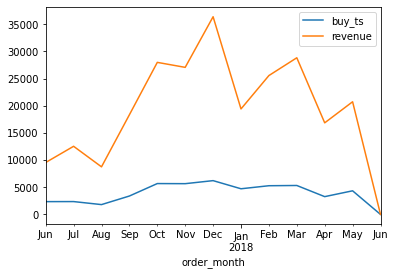

In [43]:
df_orders.groupby(['order_month']).agg({'buy_ts':'count', 'revenue': 'sum'}).plot()

In [44]:
transaction_count = df_orders.groupby(['order_year']).agg({'uid':'count', 'revenue':'sum'})
transaction_count

,uid,revenue
order_year,,
2017,27467,140647.48
2018,22948,111409.72


On a monthly basis, the number of orders increases from the end of the year to the beginning of the following year, with a similar trend observed in revenue. When separated by year, the number of orders in 2017 was higher than in 2018, with a total of 27,467 users.

### Determine the Average Purchase Value

In [45]:
df_orders['revenue'].mean()

4.999646930477041

The average purchase value is 4.99.

### Determine the Total Revenue They Contribute (LTV)

In [46]:
first_buy.sample(5)

,uid,first_session_start,first_session_dt,first_session_week,first_session_month,first_session_year,first_order_ts,first_order_date,first_order_month,first_order_week,first_session_date,first_day_purchase
31895,16104367063775244848,2017-10-25 12:00:00,2017-10-25,2017-10-19,2017-10-01,2017-01-01,2017-10-25 12:07:00,2017-10-25,2017-10-01,2017-10-19,2017-10-25,0
30144,15196874547580351666,2017-08-04 19:30:00,2017-08-04,2017-08-03,2017-08-01,2017-01-01,2017-08-04 19:31:00,2017-08-04,2017-08-01,2017-08-03,2017-08-04,0
16913,8504129682730890046,2018-03-16 12:01:00,2018-03-16,2018-03-15,2018-03-01,2018-01-01,2018-03-16 12:41:00,2018-03-16,2018-03-01,2018-03-15,2018-03-16,0
14679,7371856473122685515,2018-03-07 16:04:00,2018-03-07,2018-03-01,2018-03-01,2018-01-01,2018-03-07 16:09:00,2018-03-07,2018-03-01,2018-03-01,2018-03-07,0
32880,16592714751175379184,2018-01-29 10:12:00,2018-01-29,2018-01-25,2018-01-01,2018-01-01,2018-02-08 10:21:00,2018-02-08,2018-02-01,2018-02-08,2018-01-29,10


In [47]:
cohort_sizes = first_buy.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.sample(5)

,first_order_month,n_buyers
9,2018-03-01,3533
0,2017-06-01,2023
1,2017-07-01,1923
6,2017-12-01,4383
2,2017-08-01,1370


In [48]:
cohorts = pd.merge(df_orders, first_buy, on='uid')
cohorts_agg = cohorts.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts_agg.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [49]:
cohorts_agg['age_month'] = (cohorts_agg['order_month'] - cohorts_agg['first_order_month']).dt.days
cohorts_agg['age_month'] = round(cohorts_agg['age_month']/30).astype('int')
cohorts_agg.columns = ['first_order_month', 'order_month', 'revenue', 'age_month']
cohorts_agg

,first_order_month,order_month,revenue,age_month
0,2017-06-01,2017-06-01,9557.49,0
1,2017-06-01,2017-07-01,981.82,1
2,2017-06-01,2017-08-01,885.34,2
3,2017-06-01,2017-09-01,1931.30,3
4,2017-06-01,2017-10-01,2068.58,4
...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,2
75,2018-04-01,2018-04-01,10600.69,0
76,2018-04-01,2018-05-01,1209.92,1
77,2018-05-01,2018-05-01,13925.76,0


In [50]:
margin_rate = 0.5

report = pd.merge(cohort_sizes, cohorts_agg, on='first_order_month')
report['gp'] = report['revenue'] * margin_rate
report['ltv'] = report['gp'] / report['n_buyers']

result = report.pivot_table(index='first_order_month', columns='age_month', values='ltv', aggfunc='mean').round(2)

#result = result.fillna('')
result

age_month,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,2.36,0.24,0.22,0.48,0.51,0.37,0.48,0.29,0.28,0.30,0.29,0.13
2017-07-01,3.01,0.17,0.31,0.18,0.09,0.08,0.06,0.07,0.08,0.07,0.08,NaN
2017-08-01,2.64,0.24,0.23,0.20,0.25,0.14,0.11,0.20,0.15,0.09,NaN,NaN
2017-09-01,2.82,0.56,0.26,1.99,0.20,0.32,0.35,0.12,0.09,NaN,NaN,NaN
2017-10-01,2.50,0.27,0.10,0.08,0.08,0.06,0.04,0.06,NaN,NaN,NaN,NaN
2017-11-01,2.58,0.20,0.10,0.16,0.07,0.03,0.06,NaN,NaN,NaN,NaN,NaN
2017-12-01,2.37,0.13,0.46,0.53,0.16,0.17,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,2.07,0.15,0.15,0.07,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,2.08,0.14,0.04,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Life-Time Value (LTV) Heatmap'}, xlabel='age_month', ylabel='first_order_month'>

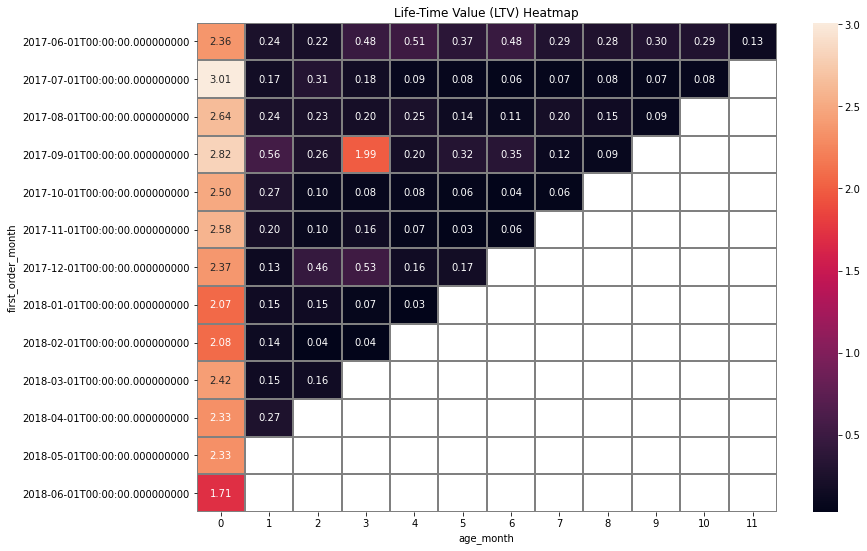

In [51]:
plt.figure(figsize=(13, 9))
plt.title('Life-Time Value (LTV) Heatmap')
sns.heatmap(
    result,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',
)

The average LTV tends to decline after the first few months. This may indicate that users become less active or less profitable after the initial months of usage.

## Marketing

### Determine the Amount of Money Spent (Overall/Per Source/Over Time)

In [52]:
df_costs.sample()

,source_id,dt,costs
686,2,2018-04-22,76.97


In [53]:
df_costs['month'] = df_costs['dt'].astype('datetime64[M]')

In [54]:
df_costs.sample()

,source_id,dt,costs,month
2079,9,2018-02-19,23.54,2018-02-01


In [55]:
total_costs = df_costs['costs'].sum()
total_costs

329131.62

<AxesSubplot:title={'center':'Costs yang digunakan per bulan'}, xlabel='month'>

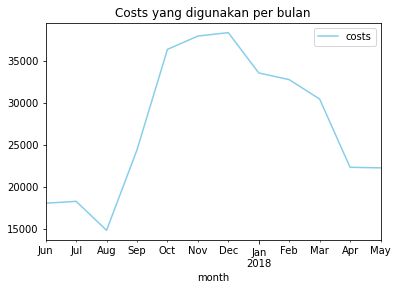

In [56]:
df_costs.pivot_table(index='month', values='costs', aggfunc='sum').plot(kind='line', color='skyblue', title='Costs yang digunakan per bulan')

In [57]:
costs_by_sources = df_costs.groupby('source_id').agg({'costs':'sum'}).sort_values(by='costs')
costs_by_sources

,costs
source_id,
9,5517.49
10,5822.49
1,20833.27
2,42806.04
5,51757.10
4,61073.60
3,141321.63


In [58]:
costs_per_source_by_month = df_costs.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum')
costs_per_source_by_month

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


<AxesSubplot:xlabel='month'>

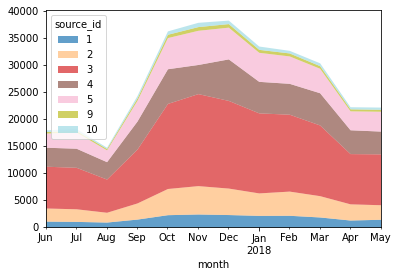

In [59]:
costs_per_source_by_month.plot(kind='area', stacked=True, colormap='tab20', alpha=0.7, linewidth=0)

* The total expenditure is 329,131.62
* The highest expenditure per source is for source_id 3
* The largest amount of spending occurred between October and December 2017

### Determine the Customer Acquisition Cost from Each Source

In [60]:
df_costs.sample(5)

,source_id,dt,costs,month
1622,5,2017-11-18,176.74,2017-11-01
947,3,2018-01-08,252.17,2018-01-01
1700,5,2018-02-04,173.87,2018-02-01
1496,5,2017-07-15,161.95,2017-07-01
1030,3,2018-04-03,506.88,2018-04-01


In [61]:
first_buy.sample(5)

,uid,first_session_start,first_session_dt,first_session_week,first_session_month,first_session_year,first_order_ts,first_order_date,first_order_month,first_order_week,first_session_date,first_day_purchase
22298,11257610740731491072,2017-10-24 19:57:00,2017-10-24,2017-10-19,2017-10-01,2017-01-01,2017-10-24 20:06:00,2017-10-24,2017-10-01,2017-10-19,2017-10-24,0
22514,11371846661300230134,2017-07-05 07:05:00,2017-07-05,2017-06-29,2017-07-01,2017-01-01,2017-09-05 09:22:00,2017-09-05,2017-09-01,2017-08-31,2017-07-05,62
20014,10120376390056084516,2017-10-07 21:55:00,2017-10-07,2017-10-05,2017-10-01,2017-01-01,2017-10-07 23:07:00,2017-10-07,2017-10-01,2017-10-05,2017-10-07,0
36275,18315876241148817756,2017-12-16 00:22:00,2017-12-16,2017-12-14,2017-12-01,2017-01-01,2017-12-16 00:27:00,2017-12-16,2017-12-01,2017-12-14,2017-12-16,0
9547,4827447267481814798,2017-06-08 21:48:00,2017-06-08,2017-06-08,2017-06-01,2017-01-01,2017-08-07 11:30:00,2017-08-07,2017-08-01,2017-08-03,2017-06-08,60


In [62]:
df_visits.sample(5)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec
303760,touch,2017-11-19 20:17:00,4,2017-11-19 19:55:00,16361109372264320792,2017,11,46,2017-11-19,1320
181091,desktop,2017-12-03 13:33:00,10,2017-12-03 13:33:00,14307344985655197784,2017,12,48,2017-12-03,0
176669,desktop,2018-04-19 01:10:00,4,2018-04-19 01:08:00,16521204326614386826,2018,4,16,2018-04-19,120
263783,desktop,2018-02-22 07:38:00,5,2018-02-22 07:35:00,3680356598076028182,2018,2,8,2018-02-22,180
73929,desktop,2017-06-22 14:46:00,5,2017-06-22 14:45:00,4613484822268175589,2017,6,25,2017-06-22,60


In [63]:
user = df_visits.sort_values('start_ts').groupby('uid').first()
user = user[['source_id']]
user

,source_id
uid,
11863502262781,3
49537067089222,2
297729379853735,3
313578113262317,2
325320750514679,5
...,...
18446403737806311543,5
18446424184725333426,4
18446556406699109058,3


In [64]:
buyers = pd.merge(first_buy, user, left_on='uid', right_index=True)
buyers_daily = buyers.groupby(['source_id', 'first_order_date']).agg({'uid': 'count'}).reset_index()
buyers_daily.rename(columns={'uid': 'n_buyers'}, inplace=True)
buyers_daily['first_order_date'] = pd.to_datetime(buyers_daily['first_order_date'])
buyers_daily.sample(5)

,source_id,first_order_date,n_buyers
864,3,2017-10-20,31
2322,10,2018-01-30,7
2201,10,2017-09-21,5
771,3,2017-07-19,18
1657,5,2017-12-26,42


In [65]:
costs = pd.merge(buyers_daily, df_costs, left_on=['source_id', 'first_order_date'], right_on=['source_id', 'month'])
costs['cac'] = costs['costs'] / costs['n_buyers']
costs

,source_id,first_order_date,n_buyers,dt,costs,month,cac
0,1,2017-06-01,14,2017-06-01,75.20,2017-06-01,5.371429
1,1,2017-06-01,14,2017-06-02,62.25,2017-06-01,4.446429
2,1,2017-06-01,14,2017-06-03,36.53,2017-06-01,2.609286
3,1,2017-06-01,14,2017-06-04,55.00,2017-06-01,3.928571
4,1,2017-06-01,14,2017-06-05,57.08,2017-06-01,4.077143
...,...,...,...,...,...,...,...
2210,10,2018-05-01,1,2018-05-27,9.92,2018-05-01,9.920000
2211,10,2018-05-01,1,2018-05-28,21.26,2018-05-01,21.260000
2212,10,2018-05-01,1,2018-05-29,11.32,2018-05-01,11.320000
2213,10,2018-05-01,1,2018-05-30,33.15,2018-05-01,33.150000


<AxesSubplot:xlabel='source_id'>

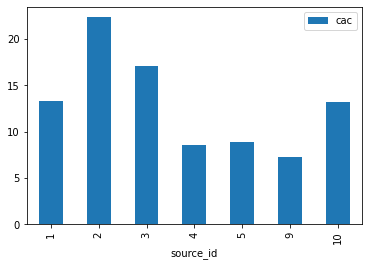

In [66]:
costs.groupby('source_id').agg({'cac': 'mean'}).round(2).plot(kind='bar')

The average CAC from each source is highest for source 2.

### Determine the Profitability of the Investment Through ROI

In [67]:
report.head(5)

,first_order_month,n_buyers,order_month,revenue,age_month,gp,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4778.745,2.362207
1,2017-06-01,2023,2017-07-01,981.82,1,490.910,0.242664
2,2017-06-01,2023,2017-08-01,885.34,2,442.670,0.218819
3,2017-06-01,2023,2017-09-01,1931.30,3,965.650,0.477336
4,2017-06-01,2023,2017-10-01,2068.58,4,1034.290,0.511265


In [68]:
costs.head(5)

,source_id,first_order_date,n_buyers,dt,costs,month,cac
0,1,2017-06-01,14,2017-06-01,75.20,2017-06-01,5.371429
1,1,2017-06-01,14,2017-06-02,62.25,2017-06-01,4.446429
2,1,2017-06-01,14,2017-06-03,36.53,2017-06-01,2.609286
3,1,2017-06-01,14,2017-06-04,55.00,2017-06-01,3.928571
4,1,2017-06-01,14,2017-06-05,57.08,2017-06-01,4.077143


In [69]:
total_revenue = df_orders['revenue'].sum()

# Total Biaya Akuisisi Pelanggan (Total CaC) per sumber
total_cac_by_source = df_costs.groupby('source_id')['costs'].sum()

# Total Biaya Akuisisi Pelanggan (Total CaC)
total_cac = total_cac_by_source.sum()

# Menghitung ROI
roi = ((total_revenue - total_cac) / total_cac) * 100

roi

-23.41750695360109

The invested funds have not yet broken even with the received funds, resulting in an ROI of -23.41%.

# Conclusion

* The column names of the three files have been changed, and the data types for each column have been adjusted as necessary. Each file has no missing rows. Therefore, the data is ready for further analysis.
* The number of people using the product daily is 907, weekly is 5,716, and monthly is 23,228.
* The average number of sessions per user tends to be around 1, indicating that most users have one session per day, with a higher frequency towards the end of the year.
* The average duration per session is 643 seconds, or approximately 10 to 11 minutes.
* Weekly active users constitute 15% of the user base, while monthly active users make up 3%. The number is gradually decreasing.
* On average, purchases are made directly by users during their first visit.
* On a monthly basis, the number of orders increases from the end of the year to the beginning of the following year, with a similar trend observed in revenue. When separated by year, the number of orders in 2017 was higher than in 2018, with a total of 27,467 users.
* The average purchase value is 4.99.
* The average LTV tends to decline after the first few months. This may indicate that users become less active or less profitable after the initial months of usage.
* The total expenditure is 329,131.62.
* The highest expenditure per source is for source_id 3.
* The largest amount of spending occurred between October and December 2017.
* The average CAC from each source is highest for source 2.
* The invested funds have not yet broken even with the received funds, resulting in an ROI of -23.41%.

**Insight**: The average LTV tends to decline after the first few months, which may indicate that users become less active or less profitable after the initial months of usage. It is necessary to identify the factors causing the decline in LTV and make efforts to improve it.